# Import Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Load Data

In [2]:
# Set the parent path where the data files are located
parent_path = 'D:\Programs\DeepLearing\Stock_prize_Prediction\Data'

# Create a list of file paths by joining the parent path with the file names in the directory
Data_file_paths = [f'{parent_path}\{i}' for i in os.listdir(parent_path)]

# Print the list of file paths
Data_file_paths

['D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual ).csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual )_clean.csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Stocks.xlsx',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100).csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100)_clean.csv']

In [3]:
# Find the clean datasets by filtering the file paths that end with '_clean.csv'
clean_datasets = [i for i in Data_file_paths if i.endswith('_clean.csv')]

# Find the Stocks excel file by filtering the file paths that end with '.xlsx'
Stocks_excel_file = [i for i in Data_file_paths if i.endswith('.xlsx')][0]

# Print the clean datasets and Stocks excel file paths
print(clean_datasets, Stocks_excel_file, sep='\n')


['D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual )_clean.csv', 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100)_clean.csv']
D:\Programs\DeepLearing\Stock_prize_Prediction\Data\Stocks.xlsx


## Reading Data and Adjusting Settings

### Common Preprocessing and Analysis functions

In [4]:
# Define a function to save plots
def Save_plot(f_name):
    plt.tight_layout()
    plt.savefig(f"D:\Programs\DeepLearing\Stock_prize_Prediction\Plots\Wholesale_plots\{f_name}.pdf", bbox_inches='tight')
    return

# Define a function to plot the count of inactive countries in each year
def Plot_inactive_years(df):
    # Count the number of NaN values in each year
    nan_counts = df.isnull().sum()
    nan_counts_years = nan_counts[[str(i) for i in range(1960,2022)]]
    
    # Plot the count of NaN values
    plt.figure(figsize=(12,6))
    sns.barplot(x=nan_counts_years.index, y=nan_counts_years.values)
    plt.xticks(rotation=90)
    plt.xlabel("Years")
    plt.ylabel("Count of NaN Values")
    plt.title("# of inactive countries in each year")
    
    # Save the plot
    Save_plot("Count of NaN Values")
    
    # Show the plot
    plt.show()

# Define a function to plot multiple columns as line plots
def Plot_Line_plot_multiple_cols(df,cols):
    for col in cols:
        # Choose a random marker for each column
        marker = np.random.choice(['o', 's', '^', 'D',"v","2","1"])
        plt.plot(df.index, df[col], label=col.upper(), marker=marker)
    
    # Add a legend to the plot
    plt.legend()

# Define a function to calculate descriptive statistics for each row in a DataFrame
def Row_wise_describe(df):
    return df.apply(pd.Series.describe, axis=1)


### Wholesale Price Index (*2010 = 100*)

In [5]:
# Read the cleaned dataset into a pandas DataFrame
df_wholesale = pd.read_csv(clean_datasets[1])

# Display the first few rows of the DataFrame
df_wholesale.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,117.84078,127.720199,136.296423,148.795847,179.139391,220.380593,NaN,NaN,NaN,NaN


#### Wholesale Preprocessing

##### Small Intisites on the data about ⬇️
1. Total how many countries data do we have?
2. How many years data do we have?

In [6]:
print(f'1. Total how many countries data do we have? --> {df_wholesale.shape[0]}\n2. How many years data do we have? --> {df_wholesale.shape[1]-4} ')

1. Total how many countries data do we have? --> 266
2. How many years data do we have? --> 62 


**Lets check active trade years of all the countries**

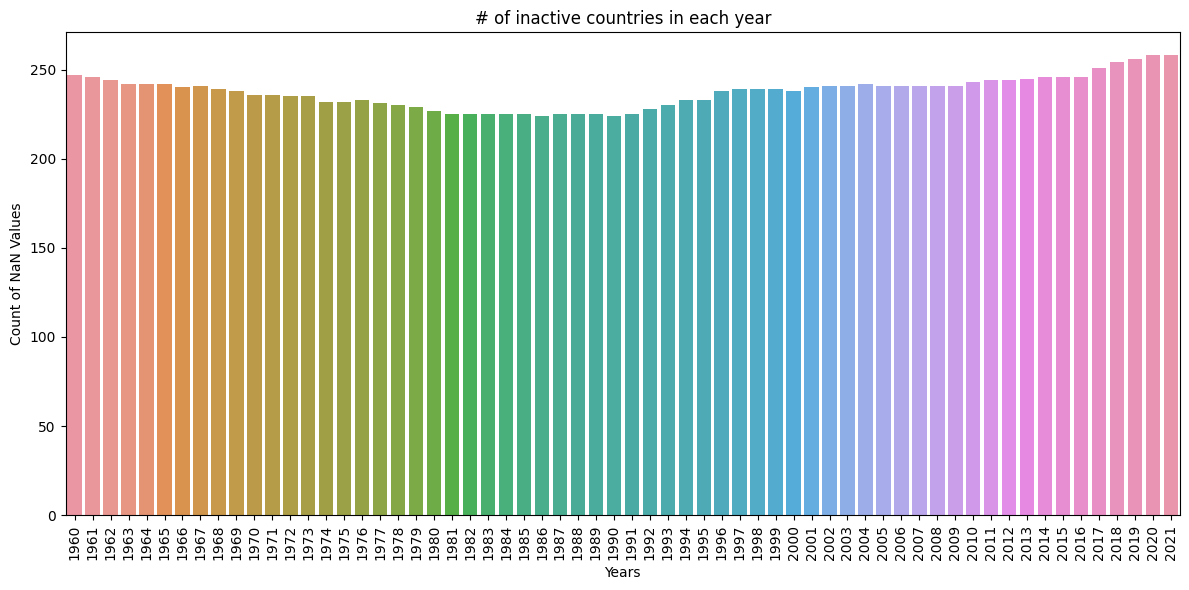

In [7]:
Plot_inactive_years(df_wholesale)

##### **--> After observing the above ⬆️ figure we decided to choose to select a range of year for our analysis.**

*We are just considering data from year 2000 in both wholesale data*

In [8]:
df_wholesale.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [9]:
valid_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+[str(i) for i in range(2000,2022)]
# Define the list of valid columns
valid_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(i) for i in range(2000, 2022)]

# Select only the valid columns from the dataframe
df_wholesale = df_wholesale[valid_cols]

In [10]:
df_wholesale.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,117.84078,127.720199,136.296423,148.795847,179.139391,220.380593,NaN,NaN,NaN,NaN


**Still we have few countries which are inactive for these 22 years as we considering so lets drop those countries.**

In [11]:
# Drop rows with missing values from the dataframe
df_wholesale = df_wholesale.dropna()

# Display the first few rows of the updated dataframe
df_wholesale.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
14,Austria,AUT,Wholesale price index (2010 = 100),FP.WPI.TOTL,81.476060,82.689306,82.390498,83.720552,87.867358,89.675025,...,110.884056,109.662795,107.530816,103.761336,101.342225,106.050398,110.499129,110.451630,105.902236,116.889593
29,Brazil,BRA,Wholesale price index (2010 = 100),FP.WPI.TOTL,40.075644,45.125923,52.645415,67.152476,74.176796,78.305613,...,115.887835,122.755629,128.317772,136.117387,151.699815,150.576010,161.017945,172.284923,203.236042,275.210971
109,India,IND,Wholesale price index (2010 = 100),FP.WPI.TOTL,58.530450,61.549853,63.072321,66.430050,70.818717,73.795819,...,117.472033,123.832178,127.984690,123.005392,122.940363,127.167193,132.592399,135.091338,135.815937,150.437981
184,Pakistan,PAK,Wholesale price index (2010 = 100),FP.WPI.TOTL,39.290284,41.081307,42.306990,45.080519,48.888957,53.153555,...,127.272369,137.183963,143.727687,140.108114,142.453404,147.398502,159.601892,180.012388,112.680894,114.654541
187,Philippines,PHL,Wholesale price index (2010 = 100),FP.WPI.TOTL,54.967861,59.239762,62.213662,65.286144,70.761571,78.767277,...,109.908425,111.794872,115.714286,117.619048,118.699634,120.934066,123.287546,125.311355,128.315018,132.252747


##### How many countries data is there after preprocessing ⬇️
1. Total how many countries data do we have?
2. How many years data do we have?

In [12]:
print(f'1. Total how many countries data do we have? --> {df_wholesale.shape[0]}\n2. How many years data do we have? --> {df_wholesale.shape[1]-4} ')

1. Total how many countries data do we have? --> 7
2. How many years data do we have? --> 22 


# Analysis

### WholeSale Data (*Wholesale price index (2010 = 100)*)

In [13]:
describe_wholesale = Row_wise_describe(df_wholesale.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],axis=1))
describe_wholesale.set_index(df_wholesale['Country Code'],inplace=True)
describe_wholesale

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
AUT,22.0,99.287485,10.908211,81.476060,90.329471,101.784442,108.113784,116.889593
BRA,22.0,115.259126,55.727633,40.075644,78.464005,104.722392,146.961354,275.210971
IND,22.0,101.842848,29.121840,58.530450,74.870957,104.735277,126.333439,150.437981
PAK,22.0,98.905873,45.040369,39.290284,54.282608,106.340447,139.377076,180.012388
PHL,22.0,98.643024,24.552013,54.967861,80.421612,104.331502,118.429487,132.252747
SAU,22.0,102.581599,19.820986,79.354508,85.122097,102.126025,110.040712,150.581071
SGP,22.0,94.408408,9.620695,80.732679,86.519007,92.807327,102.741799,110.905886


### Descriptive Analysis

##### Top 5 Countries with Max infliation in 22 years

In [14]:
top_5_max = describe_wholesale.nlargest(5,'max')
top_5_max

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
BRA,22.0,115.259126,55.727633,40.075644,78.464005,104.722392,146.961354,275.210971
PAK,22.0,98.905873,45.040369,39.290284,54.282608,106.340447,139.377076,180.012388
SAU,22.0,102.581599,19.820986,79.354508,85.122097,102.126025,110.040712,150.581071
IND,22.0,101.842848,29.121840,58.530450,74.870957,104.735277,126.333439,150.437981
PHL,22.0,98.643024,24.552013,54.967861,80.421612,104.331502,118.429487,132.252747


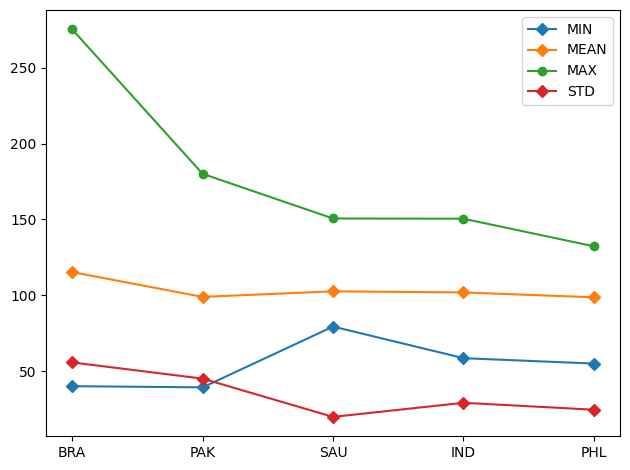

In [15]:
Plot_Line_plot_multiple_cols(top_5_max,['min','mean','max','std'])
Save_plot("top_5_max")
plt.show()

##### Top 5 Countries with Min infliation in 22 years

In [16]:
top_5_min = describe_wholesale.nlargest(5,'min')
# Calculate the top 5 countries with the minimum inflation values
top_5_min = describe_wholesale.nlargest(5, 'min')


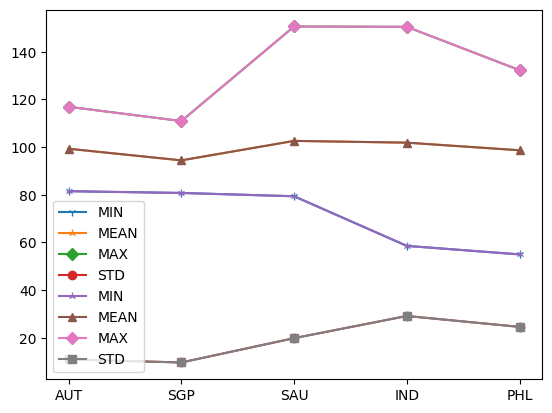

In [17]:
Plot_Line_plot_multiple_cols(top_5_min,['min','mean','max','std'])
# Plot line plots for the top 5 countries with minimum inflation
Plot_Line_plot_multiple_cols(top_5_min, ['min', 'mean', 'max', 'std'])

# Display the plot
plt.show()

In [18]:
box_plt_df = df_wholesale.drop(['Country Name', 'Indicator Name', 'Indicator Code'],axis=1)
box_plt_df_melted = box_plt_df.melt(id_vars='Country Code', var_name='Year', value_name='Value')
box_plt_df_melted.head()

,Country Code,Year,Value
0,AUT,2000,81.476060
1,BRA,2000,40.075644
2,IND,2000,58.530450
3,PAK,2000,39.290284
4,PHL,2000,54.967861


In [19]:
box_plt_df_melted.rename(columns={'Country Code': 'Country_Code'}, inplace=True)

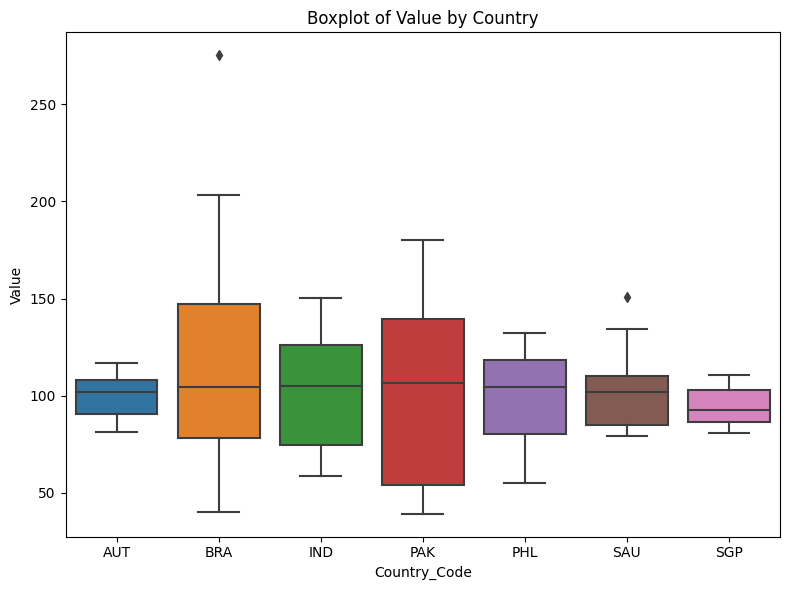

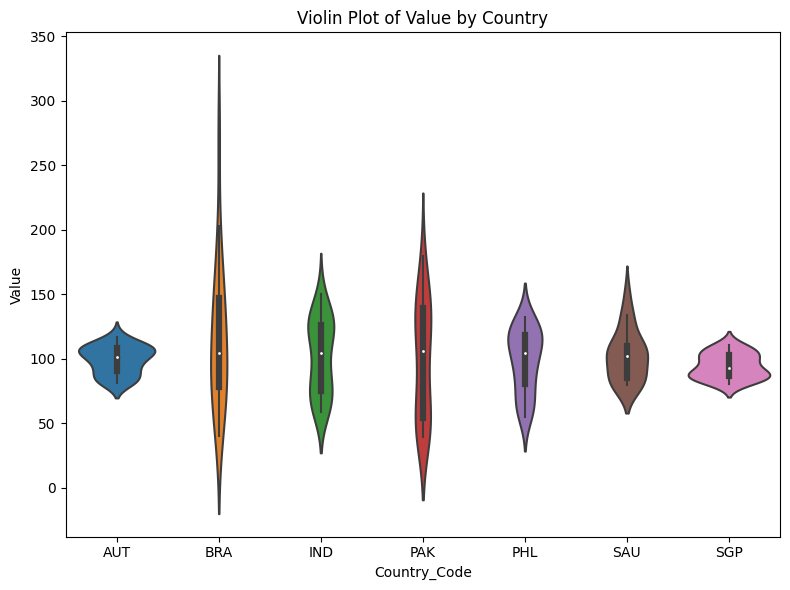

c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PorallaPradhyumna\AppData\Local\Temp\ipykernel_35460\3181300232.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

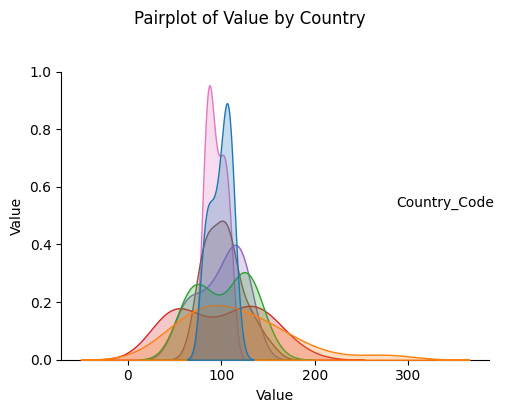

Descriptive Statistics:
              count        mean        std        min        25%         50%  \
Country_Code                                                                   
AUT            22.0   99.287485  10.908211  81.476060  90.329471  101.784442   
BRA            22.0  115.259126  55.727633  40.075644  78.464005  104.722392   
IND            22.0  101.842848  29.121840  58.530450  74.870957  104.735277   
PAK            22.0   98.905873  45.040369  39.290284  54.282608  106.340447   
PHL            22.0   98.643024  24.552013  54.967861  80.421612  104.331502   
SAU            22.0  102.581599  19.820986  79.354508  85.122097  102.126025   
SGP            22.0   94.408408   9.620695  80.732679  86.519007   92.807327   

                     75%         max  
Country_Code                          
AUT           108.113784  116.889593  
BRA           146.961354  275.210971  
IND           126.333439  150.437981  
PAK           139.377076  180.012388  
PHL           118.429

In [20]:
df = box_plt_df_melted.copy()

# Descriptive Statistics
descriptive_stats = df.groupby('Country_Code')['Value'].describe()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country_Code', y='Value', data=df)
plt.title('Boxplot of Value by Country')
Save_plot("Boxplot of Value by Country")

plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country_Code', y='Value', data=df)
plt.title('Violin Plot of Value by Country')
Save_plot("Violin Plot of Value by Country")
plt.show()

# Pairplot
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue='Country_Code', vars=['Value'], height=4)
plt.suptitle('Pairplot of Value by Country', y=1.02)
Save_plot("Pairplot of Value by Country")
plt.show()

# Correlation matrix
correlation_matrix = df.corr()

# Display descriptive statistics and correlation matrix
print('Descriptive Statistics:')
print(descriptive_stats)
print('\nCorrelation Matrix:')
print(correlation_matrix)

In [21]:

groups=[]
contry_codes = box_plt_df_melted['Country_Code'].unique()
for contry in contry_codes:
    groups.append(box_plt_df_melted[box_plt_df_melted['Country_Code']==contry]['Value'].to_list())


### Statistical Analysis

In [22]:
import scipy.stats as stats


# Perform the one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# If the p-value is less than 0.05, then there is a significant difference between the groups
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


F-statistic: 0.930534086108106
p-value: 0.4749810099618409
There is no significant difference between the groups.


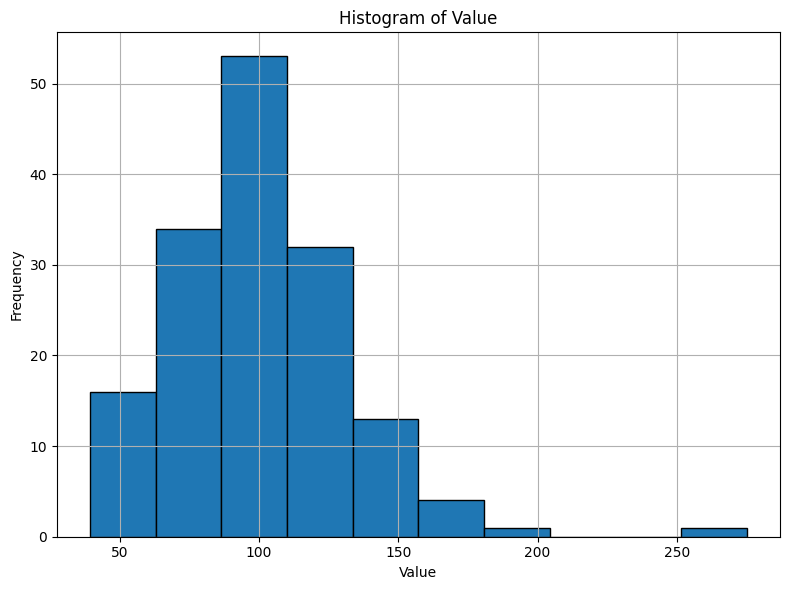

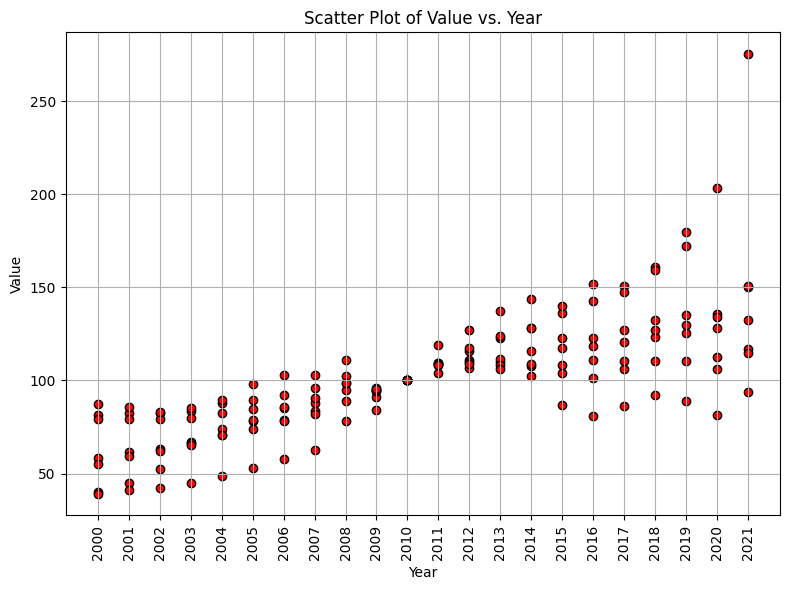

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(box_plt_df_melted["Value"], bins=10, edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Value")
plt.grid(True)
Save_plot("Histogram of Value")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(box_plt_df_melted["Year"], box_plt_df_melted["Value"], c="red", edgecolors="black")
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(rotation="vertical")
plt.title("Scatter Plot of Value vs. Year")
plt.grid(True)
Save_plot("Scatter Plot of Value vs. Year")
plt.show()



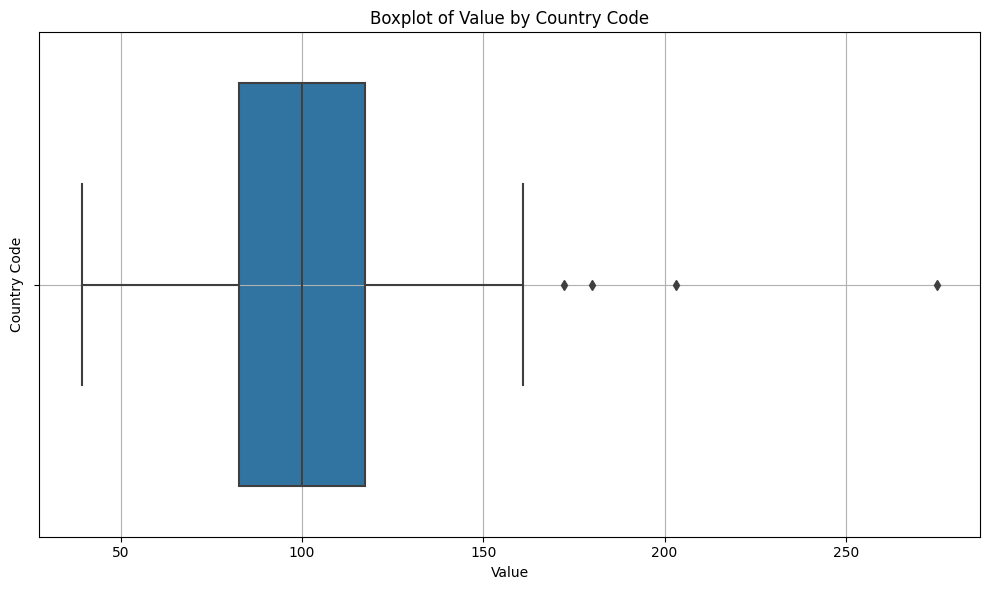

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_plt_df_melted,x='Value',hue='Country_Code')
plt.xlabel("Value")
plt.ylabel("Country Code")
plt.title("Boxplot of Value by Country Code")
plt.grid(True)
Save_plot("Boxplot of Value by Country Code")
plt.show()

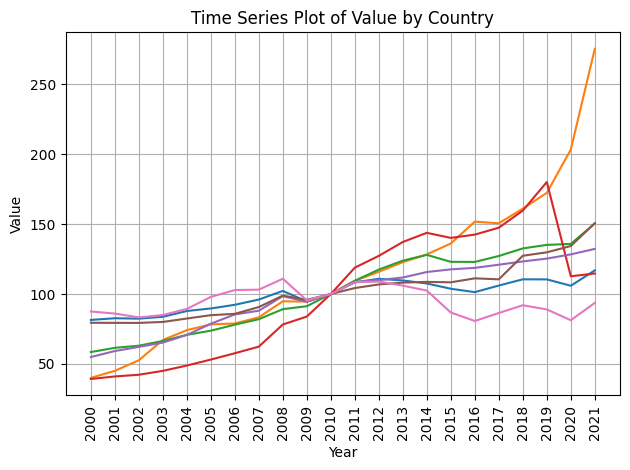

In [25]:
for country in box_plt_df_melted["Country_Code"].unique():
    country_data = box_plt_df_melted[box_plt_df_melted["Country_Code"] == country]
    plt.plot(country_data["Year"], country_data["Value"], label=country)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Time Series Plot of Value by Country")
plt.grid(True)
plt.xticks(rotation='vertical')
Save_plot("Time Series Plot of Value by Country")
plt.show()


### Correlation Analysis

Correlation Matrix:


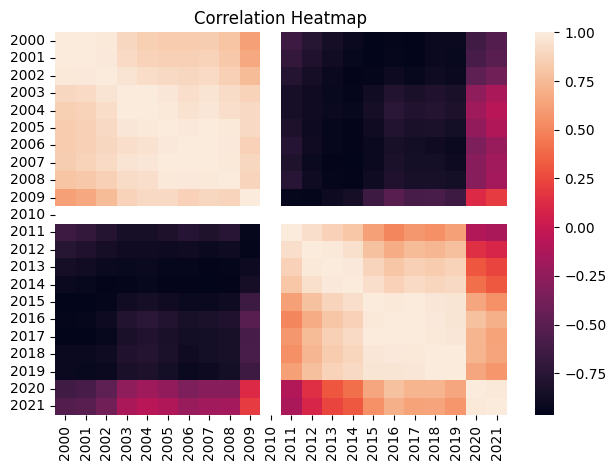

In [26]:
correlations = df_wholesale.corr()
print("Correlation Matrix:")
#print(correlations)

# Create a heatmap to visualize the correlations
sns.heatmap(correlations)
plt.title("Correlation Heatmap")
Save_plot("Correlation Heatmap")
plt.show()

In [27]:
year_mean_dict = box_plt_df_melted.groupby('Year')['Value'].describe()['mean'].to_dict()

def function(row):
    return 1 if year_mean_dict[row['Year']]>row['Value'] else 0

box_plt_df_melted['High_value'] = box_plt_df_melted.apply(function, axis=1)


In [28]:
from scipy.stats import pointbiserialr
df = box_plt_df_melted

# Calculate Point-Biserial correlation
correlation, p_value = pointbiserialr(df['High_value'], df['Value'])

# Display the correlation and p-value
print(f'Point-Biserial Correlation: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

Point-Biserial Correlation: -0.3936
P-value: 0.0000


In [29]:
box_plt_df_melted

,Country_Code,Year,Value,High_value
0,AUT,2000,81.476060,0
1,BRA,2000,40.075644,1
2,IND,2000,58.530450,1
3,PAK,2000,39.290284,1
4,PHL,2000,54.967861,1
...,...,...,...,...
149,IND,2021,150.437981,0
150,PAK,2021,114.654541,1
151,PHL,2021,132.252747,1
152,SAU,2021,150.581071,0


In [30]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

df = box_plt_df_melted

# Create a contingency table
contingency_table = pd.crosstab(df['Country_Code'], df['High_value'])

# Calculate Cramér's V
v = cramers_v(contingency_table.values)

# Display the result
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.0000


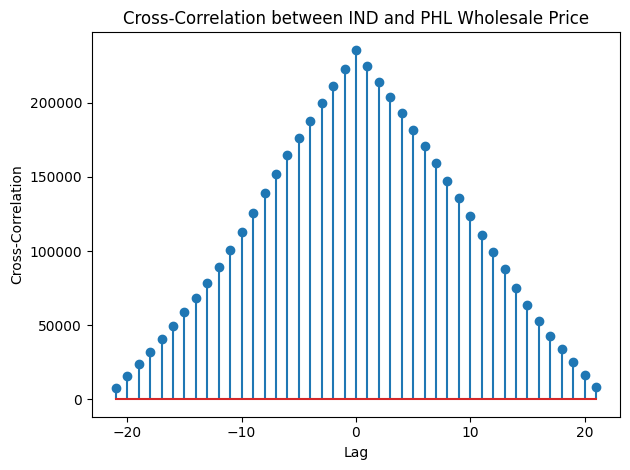

In [31]:
country_a_inflation = df_wholesale.loc[df_wholesale['Country Code'] == 'IND'].drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1).to_numpy()[0]

country_b_inflation = df_wholesale.loc[df_wholesale['Country Code'] == 'PHL'].drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1).to_numpy()[0]

# Compute cross-correlation
cross_corr = np.correlate(country_a_inflation, country_b_inflation, mode='full')

# Create lags corresponding to the cross-correlation result
lags = np.arange(-len(country_a_inflation) + 1, len(country_a_inflation))

# Plot cross-correlation
plt.stem(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between IND and PHL Wholesale Price')
Save_plot('Cross-Correlation between IND and PHL Wholesale Price')
plt.show()

##### Regression Analysis

Mean Squared Error: 264.4530586038863
Intercept: -7527.59123280736
Slope: [3.79482099]


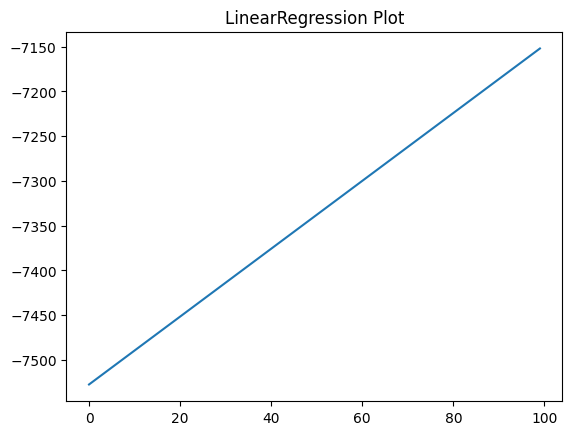

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a DataFrame from the provided data
data = box_plt_df_melted.copy()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["Year"], data["Value"], test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate the model's performance

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the model's coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

sns.lineplot(data=[model.coef_[0]*i+model.intercept_ for i in range(100)])
plt.title('LinearRegression Plot')
plt.show()

C:\Users\PorallaPradhyumna\AppData\Local\Temp\ipykernel_35460\3181300232.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


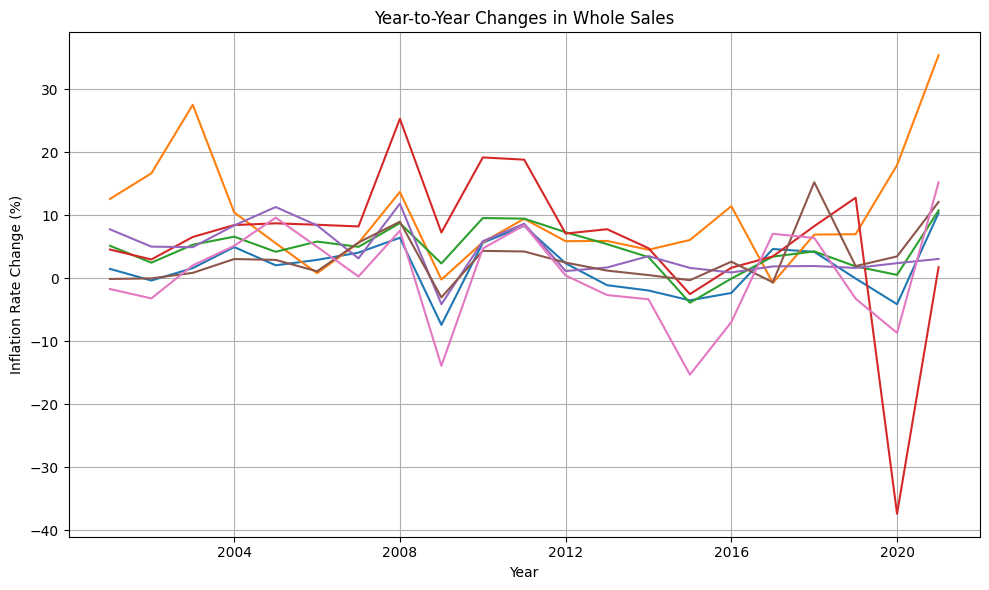

In [33]:
df = box_plt_df_melted.copy()

# Convert 'Year' column to datetime type for proper sorting
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Sort the DataFrame by 'Country Name' and 'Year'
df.sort_values(by=['Country_Code', 'Year'], inplace=True)

# Calculate year-to-year changes
df['Inflation Rate Change'] = df.groupby('Country_Code')['Value'].pct_change() * 100

# Plot the results
plt.figure(figsize=(10, 6))  # Adjust the figure size to a smaller value
for country, country_df in df.groupby('Country_Code'):
    plt.plot(country_df['Year'], country_df['Inflation Rate Change'], label=country)

plt.title('Year-to-Year Changes in Whole Sales')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Change (%)')
#plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the layout to prevent cropping of the plot
Save_plot('Year-to-Year Changes in Whole Sales')
plt.show()



In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

df = box_plt_df_melted.copy()
contingency_table = pd.crosstab(df['Country_Code'], df['Year'])

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Contingency Table:")
print(contingency_table)

Chi2 Stat: 0.0
P-value: 1.0
Degrees of Freedom: 126
Contingency Table:
Year          2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
Country_Code                                                              ...   
AUT              1     1     1     1     1     1     1     1     1     1  ...   
BRA              1     1     1     1     1     1     1     1     1     1  ...   
IND              1     1     1     1     1     1     1     1     1     1  ...   
PAK              1     1     1     1     1     1     1     1     1     1  ...   
PHL              1     1     1     1     1     1     1     1     1     1  ...   
SAU              1     1     1     1     1     1     1     1     1     1  ...   
SGP              1     1     1     1     1     1     1     1     1     1  ...   

Year          2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
Country_Code                                                              
AUT              1     1     1     1     1     1 

In [35]:
box_plt_df_melted.head()


,Country_Code,Year,Value,High_value
0,AUT,2000,81.476060,0
1,BRA,2000,40.075644,1
2,IND,2000,58.530450,1
3,PAK,2000,39.290284,1
4,PHL,2000,54.967861,1


### Lag Analysis and Stationarity Checks

     Country_Code       Value  High_value  Value Lag 1  Value Lag 2
Year                                                               
2000          AUT   81.476060           0          NaN          NaN
2000          BRA   40.075644           1    81.476060          NaN
2000          IND   58.530450           1    40.075644    81.476060
2000          PAK   39.290284           1    58.530450    40.075644
2000          PHL   54.967861           1    39.290284    58.530450
...           ...         ...         ...          ...          ...
2021          IND  150.437981           0   275.210971   116.889593
2021          PAK  114.654541           1   150.437981   275.210971
2021          PHL  132.252747           1   114.654541   150.437981
2021          SAU  150.581071           0   132.252747   114.654541
2021          SGP   93.646536           1   150.581071   132.252747

[154 rows x 5 columns]


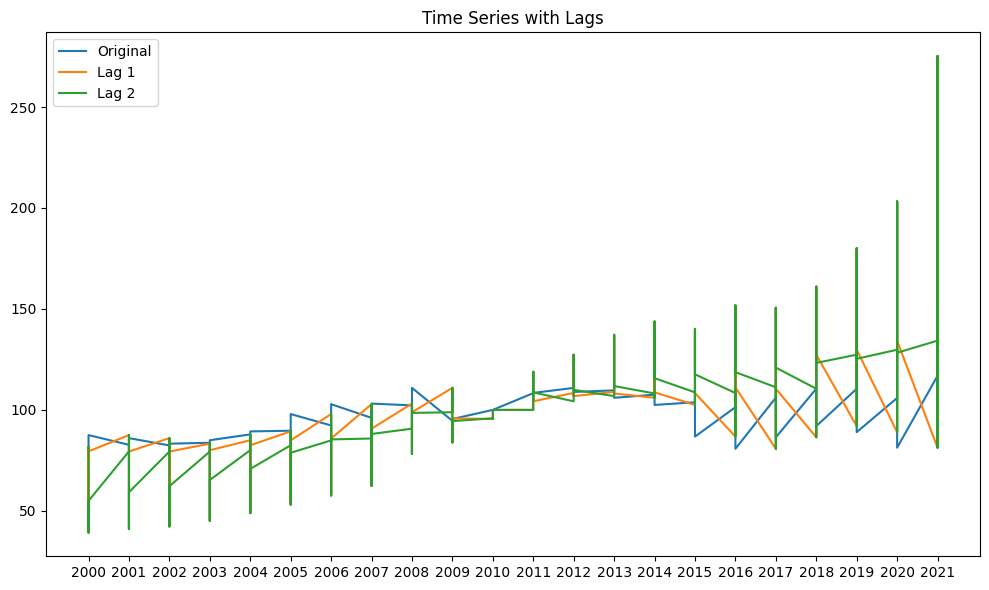

ADF Test on Original Time Series:
ADF Statistic: 0.19996614018503955
p-value: 0.9722596947767018
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}

ADF Test on First-order Difference:
ADF Statistic: -4.211877384622037
p-value: 0.0006290519257192663
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}


In [36]:
from statsmodels.tsa.stattools import adfuller
df = box_plt_df_melted.copy()
df.set_index('Year', inplace=True)

# Lag Analysis
df['Value Lag 1'] = df['Value'].shift(1)
df['Value Lag 2'] = df['Value'].shift(2)

# Display the DataFrame with lag columns
print(df)

# Plot the time series with lags
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original')
plt.plot(df['Value Lag 1'], label='Lag 1')
plt.plot(df['Value Lag 2'], label='Lag 2')
plt.legend()
plt.title('Time Series with Lags')
Save_plot('Time Series with Lags')
plt.show()

# Stationarity Check using Augmented Dickey-Fuller Test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Perform ADF test on the original time series
print('ADF Test on Original Time Series:')
adf_test(df['Value'])

# Perform ADF test on the first-order difference (lag 1)
print('\nADF Test on First-order Difference:')
adf_test(df['Value'].diff().dropna())